# AKF

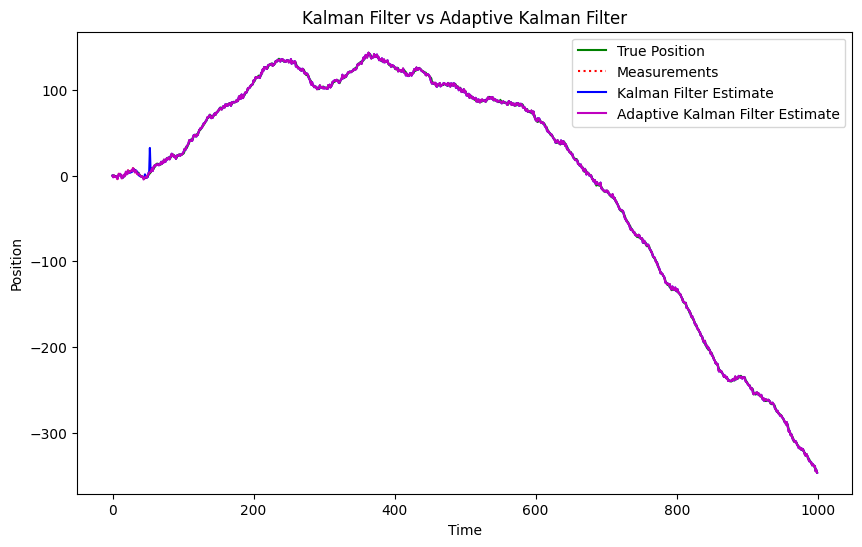

In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(20)
# 生成模拟数据，使用协方差生成实际噪声
def generate_data(T, process_noise_var, observation_noise_var):
    tr = np.zeros((T, 2))
    x = np.zeros((T, 2))  # [position, velocity]
    z = np.zeros(T)       # observations (only position is observed)
    
    x[0] = [0, 1]  # Initial position 0, velocity 1
    z[0] = x[0, 0] + np.random.normal(0, np.sqrt(observation_noise_var[0]))
    
    for t in range(1, T):
        # 实际生成过程噪声和观测噪声
        process_noise = np.random.normal(0, np.sqrt(process_noise_var[t]), 2)
        observation_noise = np.random.normal(0, np.sqrt(observation_noise_var[t]))
        tr[t] = np.dot(A, x[t-1])
        x[t] = tr[t] + process_noise  # 更新状态（带有过程噪声）
        z[t] = x[t, 0]+observation_noise   # 生成观测值（带有观测噪声）
    
    return tr,x, z

# 标准卡尔曼滤波器
def kalman_filter(T, z, Q, R):
    x_hat = np.zeros((T, 2))
    P = np.eye(2)   # 初始的不确定性
    for t in range(1, T):
        # print(P)
        # 预测步骤
        x_hat[t] = np.dot(A, x_hat[t-1])
        P = np.dot(A, np.dot(P, A.T)) + Q

        # 更新步骤
        K = np.dot(P, H.T) / (np.dot(H, np.dot(P, H.T)) + R[t])  # 卡尔曼增益
        x_hat[t] = x_hat[t] + K * (z[t] - np.dot(H, x_hat[t]))    # 更新状态估计
        P = (np.eye(2) - np.dot(K, H)) @ P  # 更新误差协方差
    
    return x_hat

# 自适应卡尔曼滤波器
def adaptive_kalman_filter(T, z, Q_initial, R_initial):
    x_hat = np.zeros((T, 2))
    P = np.eye(2) * 100  # 初始的不确定性
    Q = Q_initial.copy()
    R = R_initial.copy()
    
    for t in range(1, T):
        # 预测步骤
        x_hat[t] = np.dot(A, x_hat[t-1])
        P = np.dot(A, np.dot(P, A.T)) + Q

        # 更新步骤
        K = np.dot(P, H.T) / (np.dot(H, np.dot(P, H.T)) + R[t])
        x_hat[t] = x_hat[t] + K * (z[t] - np.dot(H, x_hat[t]))
        P = (np.eye(2) - np.dot(K, H)) @ P

        # 自适应调整噪声
        innovation = z[t] - np.dot(H, x_hat[t])
        Q = np.eye(2) * max(np.var(innovation), 1e-4)  # 自适应更新Q
        R[t] = max(np.var(innovation), 1e-4)           # 自适应更新R
        # print(innovation,Q,R)
    
    return x_hat

# 参数设置
T = 1000  # 时间步数
dt = 0.1  # 时间间隔

A = np.array([[1, dt], [0, 1]])  # 状态转移矩阵
H = np.array([1, 0])             # 观测矩阵

# 过程噪声和观测噪声的时变协方差
# process_noise_var = np.linspace(1, 2.0, T)  # 时变过程噪声协方差
# observation_noise_var = np.linspace(1, 2.0, T)  # 时变观测噪声协方差
process_noise_var = np.ones(T)*1  # 时变过程噪声协方差
observation_noise_var = np.ones(T)*1  # 时变观测噪声协方差

# 生成带有实际噪声的数据
tr, x, z = generate_data(T, process_noise_var, observation_noise_var)

# 初始噪声协方差矩阵
Q_initial = np.eye(2) * 1.0
R_initial = np.ones(T) * 1.0

# 应用卡尔曼滤波
x_hat_kf = kalman_filter(T, z, Q_initial, R_initial)

# 应用自适应卡尔曼滤波
x_hat_akf = adaptive_kalman_filter(T, z, Q_initial, R_initial)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(tr[:, 0], label="True Position", color='g')
plt.plot(z, label="Measurements", color='r', linestyle='dotted')
plt.plot(x_hat_kf[:, 0], label="Kalman Filter Estimate", color='b')
plt.plot(x_hat_akf[:, 0], label="Adaptive Kalman Filter Estimate", color='m')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Kalman Filter vs Adaptive Kalman Filter')
plt.show()


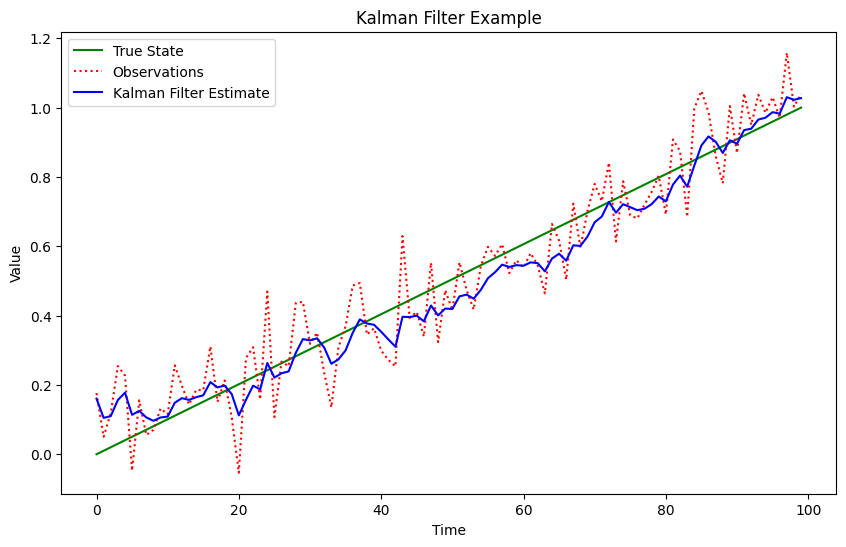

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# 生成模拟数据
np.random.seed(0)
n_samples = 100
true_state = np.linspace(0, 1, n_samples)
observations = true_state + np.random.normal(0, 0.1, n_samples)

# 设置卡尔曼滤波器
kf = KalmanFilter(transition_matrices=[1], 
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=0.1,
                  transition_covariance=0.01)

# 进行滤波
state_means, state_covariances = kf.filter(observations)

# 可视化结果
plt.figure(figsize=(10, 6))
plt.plot(true_state, label='True State', color='g')
plt.plot(observations, label='Observations', color='r', linestyle='dotted')
plt.plot(state_means, label='Kalman Filter Estimate', color='b')
# plt.fill_between(range(n_samples), 
#                  state_means - 1.96 * np.sqrt(state_covariances.flatten()), 
#                  state_means + 1.96 * np.sqrt(state_covariances.flatten()), 
#                  color='b', alpha=0.1)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Kalman Filter Example')
plt.show()


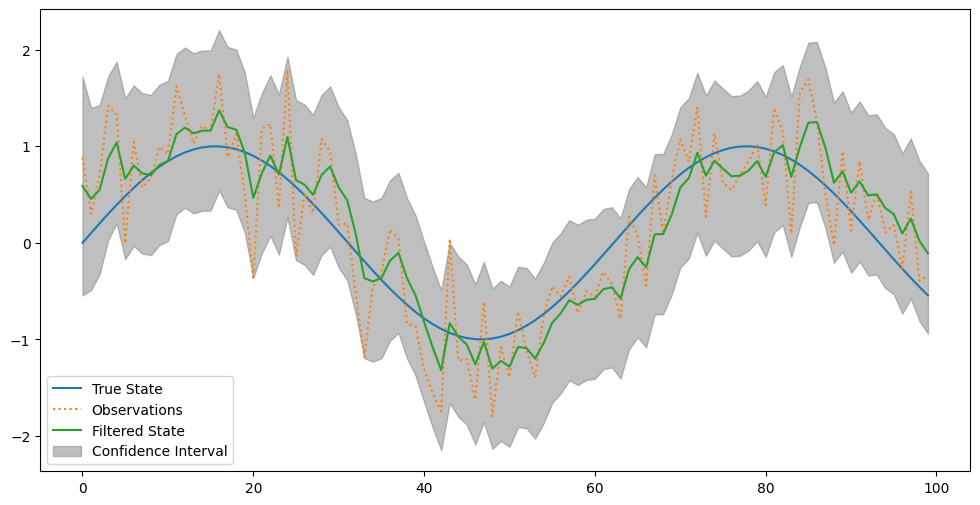

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# 生成模拟数据
np.random.seed(0)
n = 100
true_state = np.sin(np.linspace(0, 10, n))
observations = true_state + np.random.normal(0, 0.5, n)

# 定义卡尔曼滤波器
kf = KalmanFilter(initial_state_mean=0, 
                  n_dim_obs=1, 
                  n_dim_state=1)

kf.transition_matrices = [1]
kf.observation_matrices = [1]
kf.initial_state_covariance = 1 
kf.observation_covariance = 0.5
kf.transition_covariance = 0.1

# 运行卡尔曼滤波
filtered_state_means, filtered_state_covariances = kf.filter(observations)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(true_state, label='True State')
plt.plot(observations, label='Observations', linestyle='dotted')
plt.plot(filtered_state_means, label='Filtered State')
plt.fill_between(range(n), 
                 filtered_state_means.flatten() - 1.96 * np.sqrt(filtered_state_covariances.flatten()), 
                 filtered_state_means.flatten() + 1.96 * np.sqrt(filtered_state_covariances.flatten()), 
                 color='gray', alpha=0.5, label='Confidence Interval')
plt.legend()
plt.show()


In [36]:
from pykalman import KalmanFilter
import numpy as np
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

In [37]:
from numpy import ma
measurements = ma.asarray(measurements)
measurements[1] = ma.masked   # measurement at timestep 1 is unobserved
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)

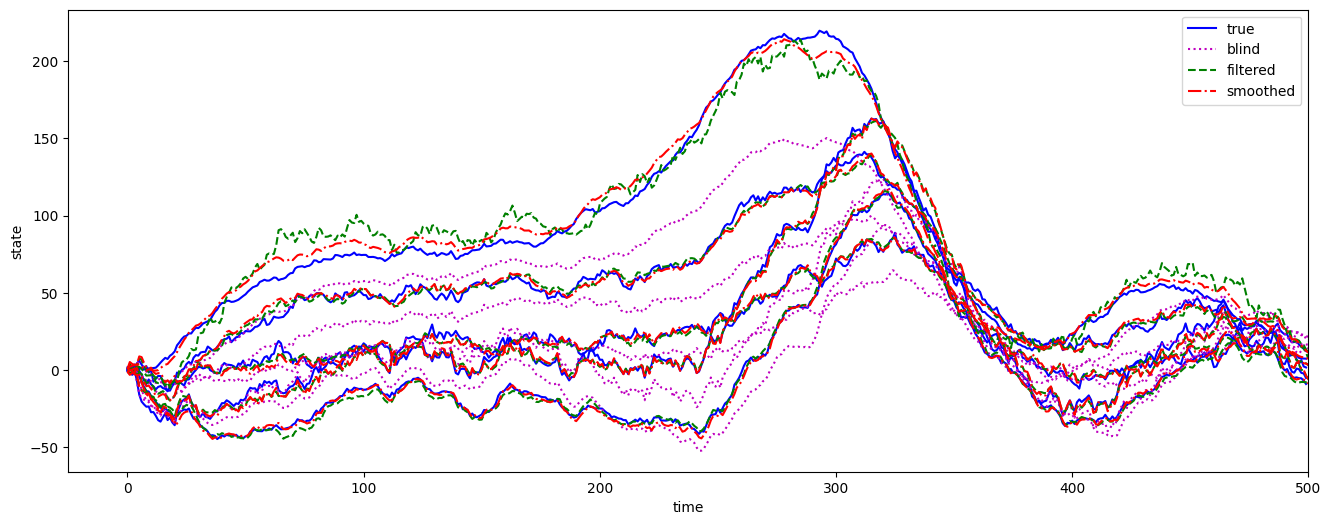

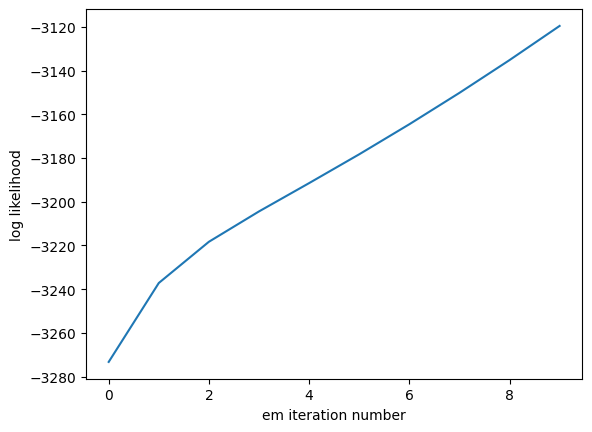

In [39]:
import numpy as np
import pylab as pl

from pykalman.datasets import load_robot
from pykalman import KalmanFilter

# Load data and initialize Kalman Filter
data = load_robot()
kf = KalmanFilter(
    data.transition_matrix,
    data.observation_matrix,
    data.initial_transition_covariance,
    data.initial_observation_covariance,
    data.transition_offsets,
    data.observation_offset,
    data.initial_state_mean,
    data.initial_state_covariance,
    em_vars=[
      'transition_matrices', 'observation_matrices',
      'transition_covariance', 'observation_covariance',
      'observation_offsets', 'initial_state_mean',
      'initial_state_covariance'
    ]
)

# Learn good values for parameters named in `em_vars` using the EM algorithm
loglikelihoods = np.zeros(10)
for i in range(len(loglikelihoods)):
    kf = kf.em(X=data.observations, n_iter=1)
    loglikelihoods[i] = kf.loglikelihood(data.observations)

# Estimate the state without using any observations.  This will let us see how
# good we could do if we ran blind.
n_dim_state = data.transition_matrix.shape[0]
n_timesteps = data.observations.shape[0]
blind_state_estimates = np.zeros((n_timesteps, n_dim_state))
for t in range(n_timesteps - 1):
    if t == 0:
        blind_state_estimates[t] = kf.initial_state_mean
    blind_state_estimates[t + 1] = (
      np.dot(kf.transition_matrices, blind_state_estimates[t])
      + kf.transition_offsets[t]
    )

# Estimate the hidden states using observations up to and including
# time t for t in [0...n_timesteps-1].  This method outputs the mean and
# covariance characterizing the Multivariate Normal distribution for
#   P(x_t | z_{1:t})
filtered_state_estimates = kf.filter(data.observations)[0]

# Estimate the hidden states using all observations.  These estimates
# will be 'smoother' (and are to be preferred) to those produced by
# simply filtering as they are made with later observations in mind.
# Probabilistically, this method produces the mean and covariance
# characterizing,
#    P(x_t | z_{1:n_timesteps})
smoothed_state_estimates = kf.smooth(data.observations)[0]

# Draw the true, blind,e filtered, and smoothed state estimates for all 5
# dimensions.
pl.figure(figsize=(16, 6))
lines_true = pl.plot(data.states, linestyle='-', color='b')
lines_blind = pl.plot(blind_state_estimates, linestyle=':', color='m')
lines_filt = pl.plot(filtered_state_estimates, linestyle='--', color='g')
lines_smooth = pl.plot(smoothed_state_estimates, linestyle='-.', color='r')
pl.legend(
    (lines_true[0], lines_blind[0], lines_filt[0], lines_smooth[0]),
    ('true', 'blind', 'filtered', 'smoothed')
)
pl.xlabel('time')
pl.ylabel('state')
pl.xlim(xmax=500)

# Draw log likelihood of observations as a function of EM iteration number.
# Notice how it is increasing (this is guaranteed by the EM algorithm)
pl.figure()
pl.plot(loglikelihoods)
pl.xlabel('em iteration number')
pl.ylabel('log likelihood')
pl.show()


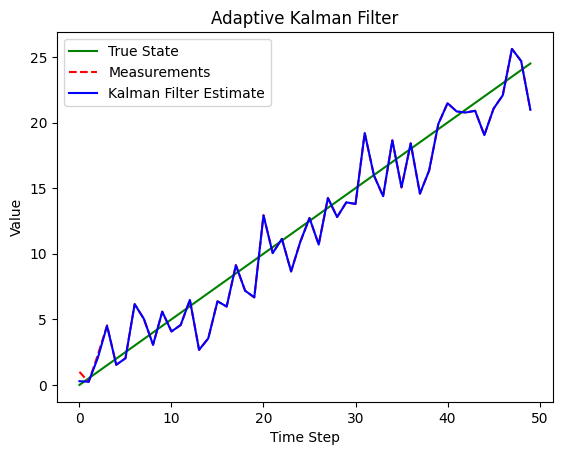

In [40]:
import numpy as np
import matplotlib.pyplot as plt

class AdaptiveKalmanFilter:
    def __init__(self, state_dim, meas_dim, process_var, meas_var):
        # 状态维度
        self.state_dim = state_dim
        self.meas_dim = meas_dim
        
        # 过程噪声和测量噪声协方差
        self.process_var = process_var
        self.meas_var = meas_var
        
        # 状态初始值和协方差估计
        self.state_estimate = np.zeros(state_dim)
        self.cov_estimate = np.eye(state_dim)

    def predict(self, transition_matrix):
        # 预测步骤
        self.state_estimate = transition_matrix @ self.state_estimate
        self.cov_estimate = transition_matrix @ self.cov_estimate @ transition_matrix.T + self.process_var

    def update(self, measurement, measurement_matrix):
        # 更新步骤
        innovation = measurement - measurement_matrix @ self.state_estimate
        innovation_cov = measurement_matrix @ self.cov_estimate @ measurement_matrix.T + self.meas_var
        
        kalman_gain = self.cov_estimate @ measurement_matrix.T @ np.linalg.inv(innovation_cov)
        
        self.state_estimate += kalman_gain @ innovation
        self.cov_estimate = (np.eye(self.state_dim) - kalman_gain @ measurement_matrix) @ self.cov_estimate
        
        # 更新测量噪声估计 (极大似然估计)
        self.meas_var = (1 - kalman_gain @ measurement_matrix) @ self.cov_estimate

def main():
    # 模拟参数
    np.random.seed(42)
    process_var = np.array([[1]])
    meas_var = np.array([[5]])
    
    # 自适应卡尔曼滤波器初始化
    akf = AdaptiveKalmanFilter(state_dim=1, meas_dim=1, process_var=process_var, meas_var=meas_var)
    
    # 模拟数据
    num_steps = 50
    true_state = [i * 0.5 for i in range(num_steps)]
    measurements = true_state + np.random.normal(0, 2, num_steps)  # 添加噪声

    # 预测和更新步骤
    estimates = []
    
    for measurement in measurements:
        akf.predict(transition_matrix=np.array([[1]]))  # 状态转移矩阵
        akf.update(measurement, measurement_matrix=np.array([[1]]))  # 测量矩阵
        estimates.append(akf.state_estimate[0])
        
    # 绘制结果
    plt.plot(true_state, label='True State', color='g')
    plt.plot(measurements, label='Measurements', color='r', linestyle='dashed')
    plt.plot(estimates, label='Kalman Filter Estimate', color='b')
    plt.legend()
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Adaptive Kalman Filter')
    plt.show()

if __name__ == "__main__":
    main()


# AKF-MAMBA
## 获取数据

In [5]:
# 股票数据
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2024, 1, 1)
# end = datetime.datetime.today()
df = web.DataReader('GOOGL', 'stooq', start, end)
df.dropna(inplace=True)
df.sort_index(inplace=True)
print(df)

                Open      High       Low     Close     Volume
Date                                                         
2014-01-02   27.8865   27.9440   27.7065   27.8280   72904600
2014-01-03   27.8750   27.9230   27.6230   27.6250   66708480
2014-01-06   27.8000   27.9715   27.6610   27.9330   70818120
2014-01-07   28.1250   28.4920   28.0290   28.4715  102144520
2014-01-08   28.6500   28.6830   28.3320   28.5310   89706880
...              ...       ...       ...       ...        ...
2023-12-22  140.7700  141.9900  140.7100  141.4900   26532199
2023-12-26  141.5900  142.6800  141.1900  141.5200   16780333
2023-12-27  141.5900  142.0800  139.8860  140.3700   19628618
2023-12-28  140.7800  141.1400  139.7500  140.2300   16045712
2023-12-29  139.6300  140.3600  138.7800  139.6900   18733017

[2516 rows x 5 columns]


In [6]:
import numpy as np

mem_his_days=5
per_days=10

# 股票数据
df['label'] = df['Close'].shift(-per_days)
# 加入噪声
df_da = df.iloc[:,:-2]
# noise = np.random.normal(0, 10, df_da.shape)
# df_da += noise

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sca_X = scaler.fit_transform(df.iloc[:,:-2])

from collections import deque
deq = deque(maxlen=mem_his_days)

X = []
for i in sca_X:
    deq.append(list(i))
    if len(deq)==mem_his_days:
        X.append(list(deq))

X_lately = X[-per_days:]
X = X[:-per_days]
y = df['label'].values[mem_his_days-1:-per_days]

import numpy as np
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)
print(len(X_lately))

(2502, 5, 4)
(2502,)
10


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# 训练数据
batch, length, dim = 64, 5, 4
# noise = np.random.normal(sca_X.mean(), 0.05*sca_X.std(), X_train.shape)
# X_train += noise
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # 确保y_train是二维张量
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# # 虚拟数据
X_train_tensor = torch.randn(1351,5,4)
y_train_tensor = torch.randn(1351,1)
X_test_tensor = torch.randn(150,5,4)
y_test_tensor = torch.randn(150,1)

# 定义训练集数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch, shuffle=True,drop_last=False)

# 定义测试集数据加载器
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch, shuffle=False)

print(X_train_tensor.shape)
print(y_train_tensor.shape)
print(X_test_tensor.shape)
print(y_test_tensor.shape)

e:\program\anaconda3\envs\yk_lstm\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1351, 5, 4])
torch.Size([1351, 1])
torch.Size([150, 5, 4])
torch.Size([150, 1])


## mam

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from modules.model_mamba import Mamba, ModelArgs,MambaBlock
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 定义模型
class SequenceModel(nn.Module):
    def __init__(self, input_dim, model_dim, state_dim, batch_size,conv_width, expand_factor, output_dim):
        super(SequenceModel, self).__init__()
        args = ModelArgs(d_model=model_dim,n_layer=state_dim,batch_size=batch,d_state=32,
                         d_conv=conv_width,vocab_size=16,expand=expand_factor)
        self.fc1 = nn.Linear(input_dim, model_dim)  # 输入层
        self.mamba = MambaBlock(args)
        self.fc2 = nn.Linear(model_dim*length, output_dim)  # 输出层

    def forward(self, x):
        x = self.fc1(x)
        x = self.mamba(x)
        x = x.view(x.size(0), -1)  # 展平，将 (batch, length, model_dim) 变为 (batch, length * model_dim)
        x = self.fc2(x)
        return x

# 初始化模型
model_mam = SequenceModel(input_dim=dim, model_dim=16, state_dim=16, batch_size=batch,
                          conv_width=4, expand_factor=2, output_dim=1)
print(model_mam)
# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model_mam.parameters(), lr=1e-4)
# 动态学习率
# scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.6)
# 训练模型
losses_mam = []
mse_test_mam = []
num_epochs = 10
for epoch in range(num_epochs):
    # 训练
    model_mam.train()
    for x_batch, y_batch in train_loader:
        # print(x_batch.shape,y_batch.shape)
        y_pred = model_mam(x_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses_mam.append(loss.item())
    # # 评价
    # model_mam.eval()
    # y_pred_batch = y_test_tensor
    # with torch.no_grad():
    #     for inputs, labels in test_loader:
    #         outputs = model_mam(inputs)
    #         y_pred_batch = torch.cat((y_pred_batch,outputs),dim=0)
    # mse = mean_squared_error(y_pred_batch[:y_test_tensor.shape[0]] , y_pred_batch[y_test_tensor.shape[0]:])
    # 评价
    model_mam.eval()
    y_pred = []
    for x_test_batch,y_test_batch in test_loader:
        with torch.no_grad():
            y_pred_batch = model_mam(x_test_batch)
            y_pred.append(y_pred_batch)
    y_pred = torch.cat(tuple(y_pred),dim=0)
    mse = mean_squared_error(y_pred , y_test_tensor)

    # 打印
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, \t Mse:{mse:.4f}')


SequenceModel(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (mamba): MambaBlock(
    (in_proj): Linear(in_features=16, out_features=64, bias=False)
    (conv1d): Conv1d(32, 32, kernel_size=(4,), stride=(1,), padding=(3,), groups=32)
    (x_proj): Linear(in_features=32, out_features=65, bias=False)
    (dt_proj): Linear(in_features=1, out_features=32, bias=True)
    (out_proj): Linear(in_features=32, out_features=16, bias=False)
  )
  (fc2): Linear(in_features=80, out_features=1, bias=True)
)
Epoch [5/10], Loss: 1.3380, 	 Mse:1.0764
Epoch [10/10], Loss: 0.6427, 	 Mse:1.0743


In [3]:
print(model_mam.mamba.deltaA.shape)

torch.Size([22, 5, 32, 32])


## KF

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from modules.model_kf_deltaLsize_1xn_in_scan import Mamba, ModelArgs,MambaBlock
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
np.random.seed(6)
torch.manual_seed(3)
# 定义模型
class SequenceModel(nn.Module):
    def __init__(self, input_dim, model_dim, state_dim, batch_size, conv_width, expand_factor, output_dim):
        super(SequenceModel, self).__init__()
        args = ModelArgs(d_model=model_dim,n_layer=state_dim,batch_size=batch,d_state=16,
                         d_conv=conv_width,vocab_size=16,expand=expand_factor)
        self.fc1 = nn.Linear(input_dim, model_dim)  # 输入层
        self.mamba = MambaBlock(args)
        self.fc2 = nn.Linear(model_dim*length, output_dim)  # 输出层

    def forward(self, x, loss_mem=None):
        self.m_in = self.fc1(x)
        self.m_ot = self.mamba(self.m_in, loss_mem)
        self.x0 = self.m_ot.view(self.m_ot.size(0), -1)  # 展平，将 (batch, length, model_dim) 变为 (batch, length * model_dim)
        x = self.fc2(self.x0)
        return x
# 初始化模型
model_kam = SequenceModel(input_dim=dim, model_dim=8, expand_factor=2,
                            state_dim=16, batch_size=batch,
                            conv_width=4, output_dim=1)
print(model_kam)
# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model_kam.parameters(), lr=1e-4)
# 动态学习率
# scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.6)
# 定义hook
latest_gradient = torch.zeros(batch,length,16)
gradient_list = [None]*50
def hook_fn(grad):
    global latest_gradient
    latest_gradient = grad if grad.shape[0]==batch else latest_gradient
    # latest_gradient = grad

    
# 训练模型
losses_kam = []
mse_test_kam = []
num_epochs = 10
for epoch in range(num_epochs):
    # 训练
    model_kam.train()
    for batch_index,(x_batch, y_batch) in enumerate(train_loader):
        y_pred = model_kam(x_batch,gradient_list[batch_index])
        loss = criterion(y_pred, y_batch)
        hook_handle = model_kam.mamba.intermediate_output.register_hook(hook_fn)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(batch_index,latest_gradient.shape)
        gradient_list[batch_index] = latest_gradient

    losses_kam.append(loss.item())
    # 评价
    model_kam.eval()
    y_pred_list = []
    y_test_list = []
    for x_test_batch,y_test_batch in test_loader:
        y_test_list.append(y_test_batch)
        with torch.no_grad():
            y_pred_batch = model_kam(x_test_batch,latest_gradient)
            y_pred_list.append(y_pred_batch)
    y_pred_lists = torch.cat(tuple(y_pred_list),dim=0)
    y_test_lists = torch.cat(tuple(y_test_list),dim=0)
    mse = mean_squared_error(y_pred_lists , y_test_lists)
    mse_test_kam.append(mse)

    # hook_handle.remove()
    # 打印
    if (epoch + 1) % 5 == 0:
        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, \t Mse:{mse:.4f}')
hook_handle.remove()

SequenceModel(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (mamba): MambaBlock(
    (in_proj): Linear(in_features=8, out_features=32, bias=False)
    (conv1d): Conv1d(16, 16, kernel_size=(4,), stride=(1,), padding=(3,), groups=16)
    (x_proj): Linear(in_features=16, out_features=33, bias=False)
    (dt_proj): Linear(in_features=1, out_features=16, bias=True)
    (out_proj): Linear(in_features=16, out_features=8, bias=False)
  )
  (fc2): Linear(in_features=40, out_features=1, bias=True)
)
Epoch [5/10], Loss: 0.5455, 	 Mse:0.8592
Epoch [10/10], Loss: 0.5577, 	 Mse:0.8591


In [49]:
latest_gradient.shape

torch.Size([64, 5, 16])

In [5]:
print(model_kam.mamba.deltaA.shape)
print(model_kam.mamba.deltaL.shape)
print(model_kam.mamba.C.shape)
# model_kam.mamba.delta.shape,model_kam.mamba.L.shape

torch.Size([22, 5, 16, 16])
torch.Size([22, 5, 16, 16])
torch.Size([22, 5, 16])


In [6]:
import einops
import numpy as np
b, l, d_in, n = 22,5,16,16
Luen_grad = torch.zeros(b,l,16)
x = torch.zeros((b, d_in, n))
A = model_kam.mamba.deltaA
Bu = model_kam.mamba.deltaB_u
deltaLgrad = einops.einsum(model_kam.mamba.deltaL,Luen_grad,'b l d_in n, b l d_in -> b l d_in n')
C = model_kam.mamba.C
ys = []
for i in range(l):
    x = A[:,i]*x+Bu[:,i]+deltaLgrad[:,i]
    y = einops.einsum(x, C[:, i], 'b d_in n, b n -> b d_in')
    ys.append(y)
print(ys[0].shape)

torch.Size([22, 16])


In [94]:
import einops
import numpy as np
b, l, d_in, n = 22,5,16,16
Luen_grad = torch.zeros(b,l,16)
x = torch.zeros((b, d_in, n))
A = model_kam.mamba.deltaA
Bu = model_kam.mamba.deltaB_u
# deltaLgrad = einops.einsum(model_kam.mamba.deltaL,Luen_grad,'b l d_in n, b l d_in -> b l d_in n')
C = model_kam.mamba.C
P = torch.eye(16)
Q = torch.eye(16)
R = torch.eye(1)
# K = einops.repeat(torch.eye(16),'d_in n -> b d_in n',b=b)
ys = []
for i in range(l):
    print('range length')
    x = A[:,i]*x+Bu[:,i]
    for j in range(b):
        print('range batch')
        P = A[j,i]@P@A[j,i].T+Q
        Ct = C[j,i].view(1,16)
        K = (P@Ct.T)@torch.inverse(Ct@P@Ct.T+R)
        P = (torch.eye(16)-K@Ct)@P
        print(P)
    x = x + einops.einsum(K, Luen_grad[:,i], 'd_in o,b d_in->b d_in o')

    y = einops.einsum(x, C[:, i], 'b d_in n, b n -> b d_in')
    ys.append(y)

range length
range batch
tensor([[1.3343, 0.2336, 0.5637, 0.3677, 0.4803, 0.1725, 0.2359, 0.4461, 0.2277,
         0.3846, 0.5020, 0.4679, 0.3456, 0.4867, 0.3275, 0.3793],
        [0.2336, 1.1672, 0.3720, 0.2557, 0.3240, 0.1243, 0.1695, 0.3010, 0.1648,
         0.2647, 0.3362, 0.3157, 0.2425, 0.3297, 0.2310, 0.2600],
        [0.5637, 0.3720, 2.0951, 0.6310, 0.8825, 0.2615, 0.3776, 0.8080, 0.3654,
         0.6682, 0.9373, 0.8557, 0.5857, 0.8932, 0.5500, 0.6587],
        [0.3677, 0.2557, 0.6310, 1.4029, 0.5329, 0.1942, 0.2551, 0.5007, 0.2421,
         0.4269, 0.5600, 0.5215, 0.3747, 0.5358, 0.3538, 0.4249],
        [0.4803, 0.3240, 0.8825, 0.5329, 1.7269, 0.2349, 0.3267, 0.6720, 0.3140,
         0.5638, 0.7679, 0.7072, 0.4956, 0.7343, 0.4665, 0.5576],
        [0.1725, 0.1243, 0.2615, 0.1942, 0.2349, 1.0773, 0.1343, 0.2023, 0.1412,
         0.1878, 0.2377, 0.2226, 0.1935, 0.2499, 0.1868, 0.1745],
        [0.2359, 0.1695, 0.3776, 0.2551, 0.3267, 0.1343, 1.1677, 0.3118, 0.1577,
         0.2

In [87]:
# K.shape,Luen_grad[:,i].shape,x.shape
einops.einsum(K, Luen_grad[:,i], 'd_in n,b d_in->b d_in n').shape

torch.Size([22, 16, 1])

In [93]:
np.ones((3,3))+np.ones((3,1))*2

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

In [101]:
import einops
import numpy as np
b, l, d_in, n = 22,5,16,16
Luen_grad = torch.zeros(b,l,16)
x = torch.zeros((b, d_in, n))
A = model_kam.mamba.deltaA
Bu = model_kam.mamba.deltaB_u
# deltaLgrad = einops.einsum(model_kam.mamba.deltaL,Luen_grad,'b l d_in n, b l d_in -> b l d_in n')
C = model_kam.mamba.C
P = einops.repeat(torch.eye(16),'d_in n -> b d_in n',b=b)
Q = einops.repeat(torch.eye(16),'d_in n -> b d_in n',b=b)
R = einops.repeat(torch.eye(1),'d_in n -> b d_in n',b=b)
K = torch.ones(b,16,1)
ys = []
for i in range(l):
    print('range length')
    x = A[:,i]*x+Bu[:,i]
    for j in range(b):
        print('range batch')
        P[j] = (A[j,i]@P[j])@A[j,i].T+Q[j]
        Ct = C[j,i].view(1,16)
        K[j] = (P[j]@Ct.T)@torch.inverse(Ct@P[j]@Ct.T+R[j])
        P[j] = (torch.eye(16)-K[j]@Ct)@P[j]
        print(P)
    x = x + einops.einsum(K, Luen_grad[:,i], 'b d_in n,b d_in->b d_in n')

    y = einops.einsum(x, C[:, i], 'b d_in n, b n -> b d_in')
    ys.append(y)

range length
range batch
tensor([[[1.3343, 0.2336, 0.5637,  ..., 0.4867, 0.3275, 0.3793],
         [0.2336, 1.1672, 0.3720,  ..., 0.3297, 0.2310, 0.2600],
         [0.5637, 0.3720, 2.0951,  ..., 0.8932, 0.5500, 0.6587],
         ...,
         [0.4867, 0.3297, 0.8932,  ..., 1.7347, 0.4625, 0.5749],
         [0.3275, 0.2310, 0.5500,  ..., 0.4625, 1.3058, 0.3858],
         [0.3793, 0.2600, 0.6587,  ..., 0.5749, 0.3858, 1.4189]],

        [[1.3343, 0.2336, 0.5637,  ..., 0.4867, 0.3275, 0.3793],
         [0.2336, 1.1672, 0.3720,  ..., 0.3297, 0.2310, 0.2600],
         [0.5637, 0.3720, 2.0951,  ..., 0.8932, 0.5500, 0.6587],
         ...,
         [0.4867, 0.3297, 0.8932,  ..., 1.7347, 0.4625, 0.5749],
         [0.3275, 0.2310, 0.5500,  ..., 0.4625, 1.3058, 0.3858],
         [0.3793, 0.2600, 0.6587,  ..., 0.5749, 0.3858, 1.4189]],

        [[1.3343, 0.2336, 0.5637,  ..., 0.4867, 0.3275, 0.3793],
         [0.2336, 1.1672, 0.3720,  ..., 0.3297, 0.2310, 0.2600],
         [0.5637, 0.3720, 2.0951,

In [99]:
(einops.einsum(K, Luen_grad[:,i], 'b d_in n,b d_in->b d_in n')).shape

torch.Size([22, 16, 1])

In [59]:
(P[j]@Ct.T@torch.inverse(Ct@P[j]@Ct.T+R[j])).shape

torch.Size([16, 1])

In [ ]:
1,2,3,4,5,6,7,8,9

In [ ]:
1,2,3
2,3,4
3,4,5

4,5,6
5,6,7
6,7,8

7,8,9